#**Laboratorio: función de densidad Gaussiana multivariable**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

En este laboratorio podremos tener una inspección visual de las funciones de densidad de probabilidad Gaussianas en dos dimensiones para diferentes casos.



#**Una sola variable aleatoria Gaussiana**

Recordemos que una variable aleatoria Gaussiana $X$ tiene dos parámetros que definen su distribución de probabilidad: el valor esperado o media $\mu\in\mathbb{R}$, y la varianza $\sigma^2$. La función de densidad de probabilidad se define como:

$$p(x)=N(x; \mu, \sigma^2)=\frac{1}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}.$$

El valor de $\mu$ nos indica dónde está centrada la campana, y el valor de $\sigma^2$ define la altura y ancho de la campana. Valores altos de $\sigma^2$ implica que la campana es ancha y baja. Ahora graficamos $p(x)$ para $μ=59$ y $σ=6$. Para esto utilizaremos el código del Laboratorio de probabilidad donde se explica la función de densidad de probabilidad para una distribución normal.

In [ ]:
# Función para la distribución normal
def distr_normal(x, media, desv_est):
    constante = 1 / (desv_est * np.sqrt(2 * np.pi))
    exponente = -((x - media)**2) / (2 * desv_est**2)
    distr = constante * np.exp(exponente)
    return distr

# Se asignan los valores a los parámetros correspondientes
x=np.array([random.gauss(59,6) for i in range(1000)])
media=59
desv_est=6

#Se define el eje x y se halla la función de densidad para la distribución normal.
xx=np.linspace(x.min(),x.max(),len(x))
distr_N =[distr_normal(x, media, desv_est)  for x in xx]

#Se grafica la gaussiana
plt.plot(xx, distr_N, label="Distribución uniforme", color='blue')
plt.ylabel('Densidad de probabilidad')
plt.xlabel("Valor")
plt.title("Gaussiana en 1D")
plt.show()



Esta función nos indica la factibilidad de ocurrencia de la variable aleatoria $X$ para los diferentes valores de $x$.

#**Distribución Gaussiana multivariable:**

Ahora asumamos que $X=[X_1, \cdots, X_n]^T$ es un vector aleatorio Gaussiano. Sea $x ∈ \ ℝ^n$ una observación de este vector. La función de densidad de probabilidad del vector Gaussiano $X$ se define como:

$$p(x)= \dfrac{1}{\sqrt{\det(Q)}}\dfrac{1}{(2π)^{n/2}} e^{-\dfrac{1}{2}(x-μ)^TQ^{-1}(x-μ)},$$

donde, $μ\in\mathbb{R}^2$ es el vector de medias y la matriz $Q\succ 0$ es una matriz de $n\times n$, simétrica, positiva definida, que corresponde a la matriz de covarianza del vector aleatorio.

A continuación creamos una función que nos permite calcular $p(x)$, y observaremos el comportamiento de esta función para diferentes valores de la matriz de covarianza.

In [ ]:
def gaussiana_multivariable(x, mu, cov):
    n = len(mu)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_factor = 1 / (math.pow(2 * math.pi, n / 2) * math.sqrt(det_cov))
    exponent = -0.5 * np.dot(np.dot((x - mu).T, inv_cov), (x - mu))
    return norm_factor * math.exp(exponent)

##**Ejemplo 1: matriz de covarianza la identidad**
Observemos el comportamiento de $p(x)$ cuando $X=[X_1, X_2]^T$ y cuando la matriz de covarianza es la identidad. Esto nos indica que las variables aleatorias $X_1$ y $X_2$ son no correlacionadas y que sus varianzas son 1. Aquí,
$Q=\begin{bmatrix}
1 & 0\\
0 & 1 \\
\end{bmatrix}$,
$μ=\begin{bmatrix}
1 & 2\\
\end{bmatrix}$

In [ ]:
#Código para graficar las curvas de nivel y gráfica 3D correspondientes

#Se proporcionan los valores para los parámetros de la función
mu2 = np.array([1, 2])
cov2 = np.array([[1, 0], [0, 1]])


x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
f = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        point = np.array([x1[i, j], x2[i, j]])
        f[i, j] = gaussiana_multivariable(point, mu2, cov2)

#Se grafican en 2 subplots las curvas de nivel y la gráfica en 3D
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Curvas de nivel
axes[0].contourf(x1,x2, f, cmap='viridis')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Curvas de nivel $Q=$ Matriz identidad')

#Gráfica en 3D
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x1,x2 , f, cmap='viridis', alpha=0.8)
ax.contour(x1, x2, f, zdir='z', offset=f.min(), cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Gaussiana en 3D $Q=$ Matriz identidad')

plt.tight_layout()
plt.show()


Note que la función $p(x)$ tiene curvas de nivel circulares centradas en el vector de medias $\mu$. Esto se debe a que la matriz de covarianza es diagonal con varianzas iguales.

##**Ejemplo 2: matriz de covarianza diagonal**
Observemos el comportamiento de $p(x)$ cuando $X=[X_1, X_2]^T$ y cuando la matriz de covarianza es diagonal (pero no la identidad). Aquí hacemos:
$Q=\begin{bmatrix}
25 & 0\\
0 & 9 \\
\end{bmatrix}$,
$μ=\begin{bmatrix}
1 & 2\\
\end{bmatrix}$.
Es decir, las variables aleatorias $X_1$ y $X_2$ son no correlacionadas y tienen varianzas $25$ y $9$.

In [ ]:
#Código para graficar las curvas de nivel y gráfica 3D correspondientes

#Se proporcionan los valores para los parámetros de la función
mu3 = np.array([1, 2])
cov3 = np.array([[25, 0], [0, 9]])


x1, x2 = np.meshgrid(np.linspace(-14, 14, 100), np.linspace(-14, 14, 100))
f = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        point = np.array([x1[i, j], x2[i, j]])
        f[i, j] = gaussiana_multivariable(point, mu3, cov3)

#Se grafican en 2 subplots las curvas de nivel y la gráfica en 3D
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Curvas de nivel
axes[0].contourf(x1,x2, f, cmap='viridis')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Curvas de nivel $Q=$ Matriz diagonal')

#Gráfica en 3D
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x1,x2 , f, cmap='viridis', alpha=0.8)
ax.contour(x1, x2, f, zdir='z', offset=f.min(), cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Gaussiana en 3D $Q=$ Matriz diagonal')

plt.tight_layout()
plt.show()


Note que las curvas de nivel son elipses centradas en $\mu$ y alineadas a los ejes $x_1$ y $x_2$. Estas elipses están más alargadas a lo largo de $x_1$, debido a que la varianza de $X_2$ es mayor que la de $X_2$. También, al tener varianzas mayores que en el caso de la matriz identidad, la altura de la campana es menor. Esto con el fin de preservar las múltiples integrales de la función en 1.

##**Ejemplo 3**
Ahora observemos el comportamiento de $p(x)$ cuando $X=[X_1, X_2]^T$ y cuando la matriz de covarianza no es diagonal, pero tenemos la garantía de que es simétrica y positiva definida. Aquí hacemos:
$Q=\begin{bmatrix}
10 & 3\\
3 & 5 \\
\end{bmatrix}$,
$μ=\begin{bmatrix}
1 & 2\\
\end{bmatrix}$.
Esto nos indica que las variables aleatorias tienen covarianza $3$ y varianzas 10 y 5.

In [ ]:
#Código para graficar las curvas de nivel y gráfica 3D correspondientes

#Se proporcionan los valores para los parámetros de la función
mu3 = np.array([1, 2])
cov3 = np.array([[10, 3], [3, 5]])


x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
f = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        point = np.array([x1[i, j], x2[i, j]])
        f[i, j] = gaussiana_multivariable(point, mu3, cov3)

#Se grafican en 2 subplots las curvas de nivel y la gráfica en 3D
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Curvas de nivel
axes[0].contourf(x1,x2, f, cmap='viridis')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Curvas de nivel $Q=$ Matriz positiva simétrica')

#Gráfica en 3D
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x1,x2 , f, cmap='viridis', alpha=0.8)
ax.contour(x1, x2, f, zdir='z', offset=f.min(), cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Gaussiana en 3D $Q=$ Matriz positiva simétrica')

plt.tight_layout()
plt.show()


Note que las curvas de nivel que además de estar achatadas también presentan una rotación, revelando una correlación positiva entre las variables aleatorias $X_1$ y $X_2$. Por lo que, podemos resaltar que el papel que juega la matriz de covarianza  en la forma de las curvas de nivel y por ende en las Gaussianas es supremamente relevante.

##**Ejercicio:**

En el archivo *lab_gaussianas.xlsx* se disponen de observaciones del vector aleatorio $X=[X_1, X_2]^T$. Se sabe que este vector aleatorio es Gaussiano. Queremos graficar las curvas de nivel y la superficie de $p(x)$. Para esto, realice los siguientes pasos:

1. Importe los datos del archivo de excel. Para esto emplee la siguiente línea de código.

```
data = pd.read_excel("lab_gaussianas.xlsx")

```

2. Estime la media y matriz de covarianza de los datos. Para esto, utilice las funciones que se muestran en el código a continuación.

3. Grafique las curvas de nivel y en 3D de datos. Utilice el código de los anteriores casos, cambiando los parámetros necesarios.

Las gráficas deben tener la siguiente forma:

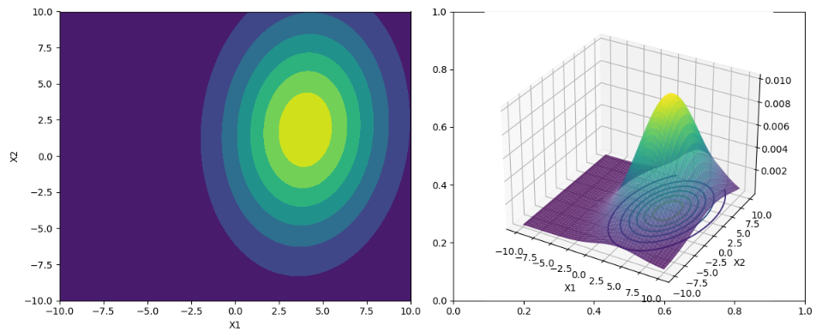

In [ ]:
#Función para estimar la media en un caso Rn
def mu(data):
  n = len(data)
  dim = len(data.columns)
  means = []
  for col in data.columns:
    mean = sum(data[col]) / n
    means.append(mean)
  return np.array(means)

#Función para estimar la matriz de covarianza
def matriz_covarianza(data, mean):
    n = len(data)
    dim = len(data.columns)
    covariance_matrix = np.zeros((dim, dim))
    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            cov = sum((data[col1] - mean[i]) * (data[col2] - mean[j])) / (n - 1)
            covariance_matrix[i, j] = cov
    return covariance_matrix
